In [1]:
import Script.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import Script.Validation as Validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

import joblib 
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## 1. Unsupervised learning: Clustering

In [137]:
kmeans = KMeans(n_clusters=5)
pred_km = kmeans.fit_predict(SE_020120)

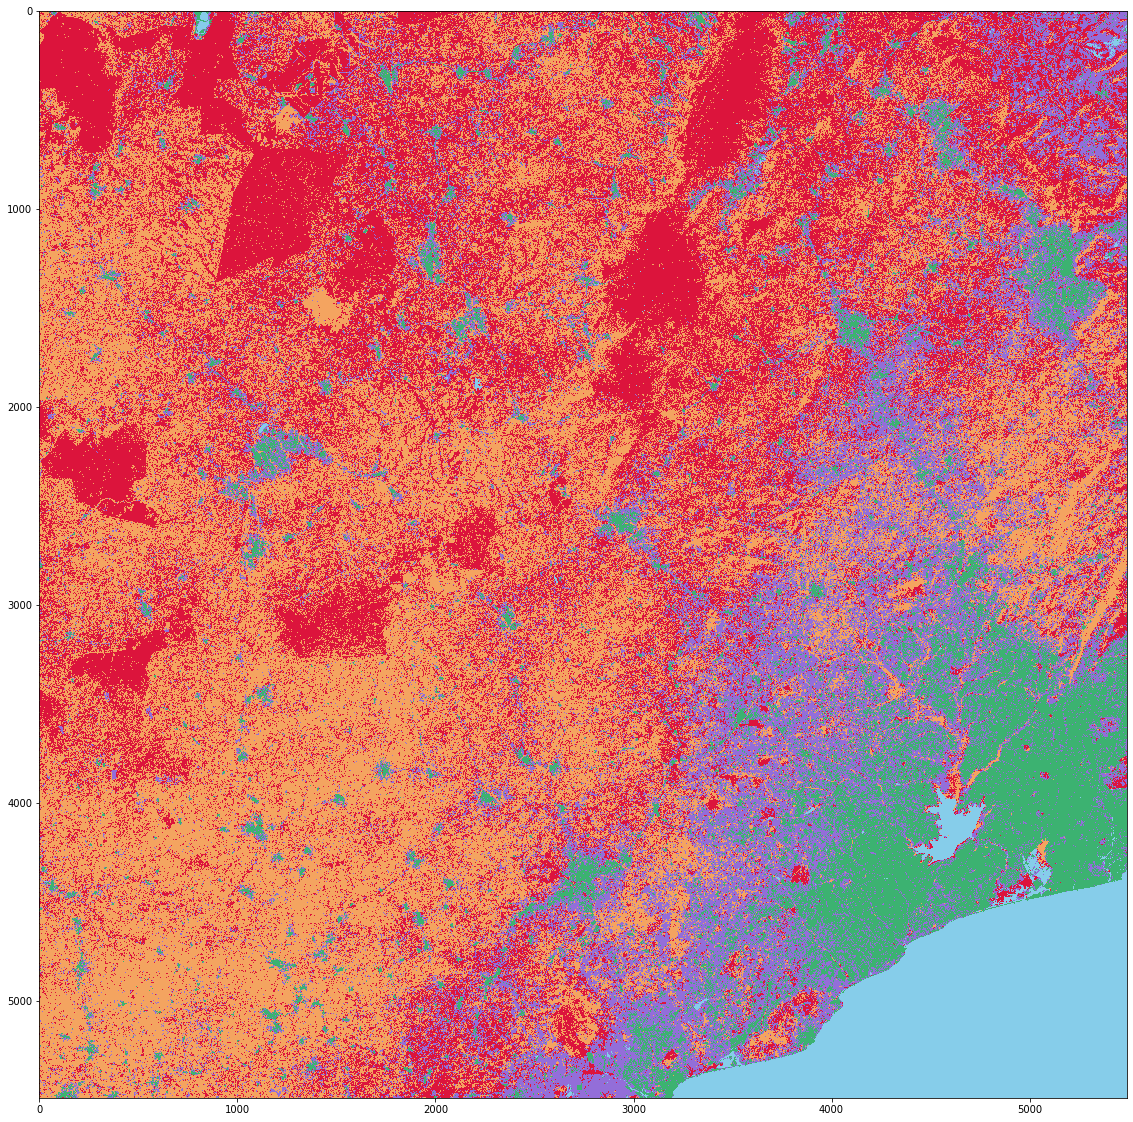

In [144]:
pred_km = np.array([x+1 for x in pred_km])
clus = pred_km.reshape(dim_SE_020120)
plt.figure(figsize = (20,20))
plt.imshow(clus, cmap='clus2')
#Image.show_pred(clus, size=50)

In [145]:
Image.save_as_tiff("C:/Users/remot/Documents/6_classes/Figures/SE/km.tif", "H:/sentinel2/Ghana/Validation/02-01-20/SE/020120_20.tif", clus)

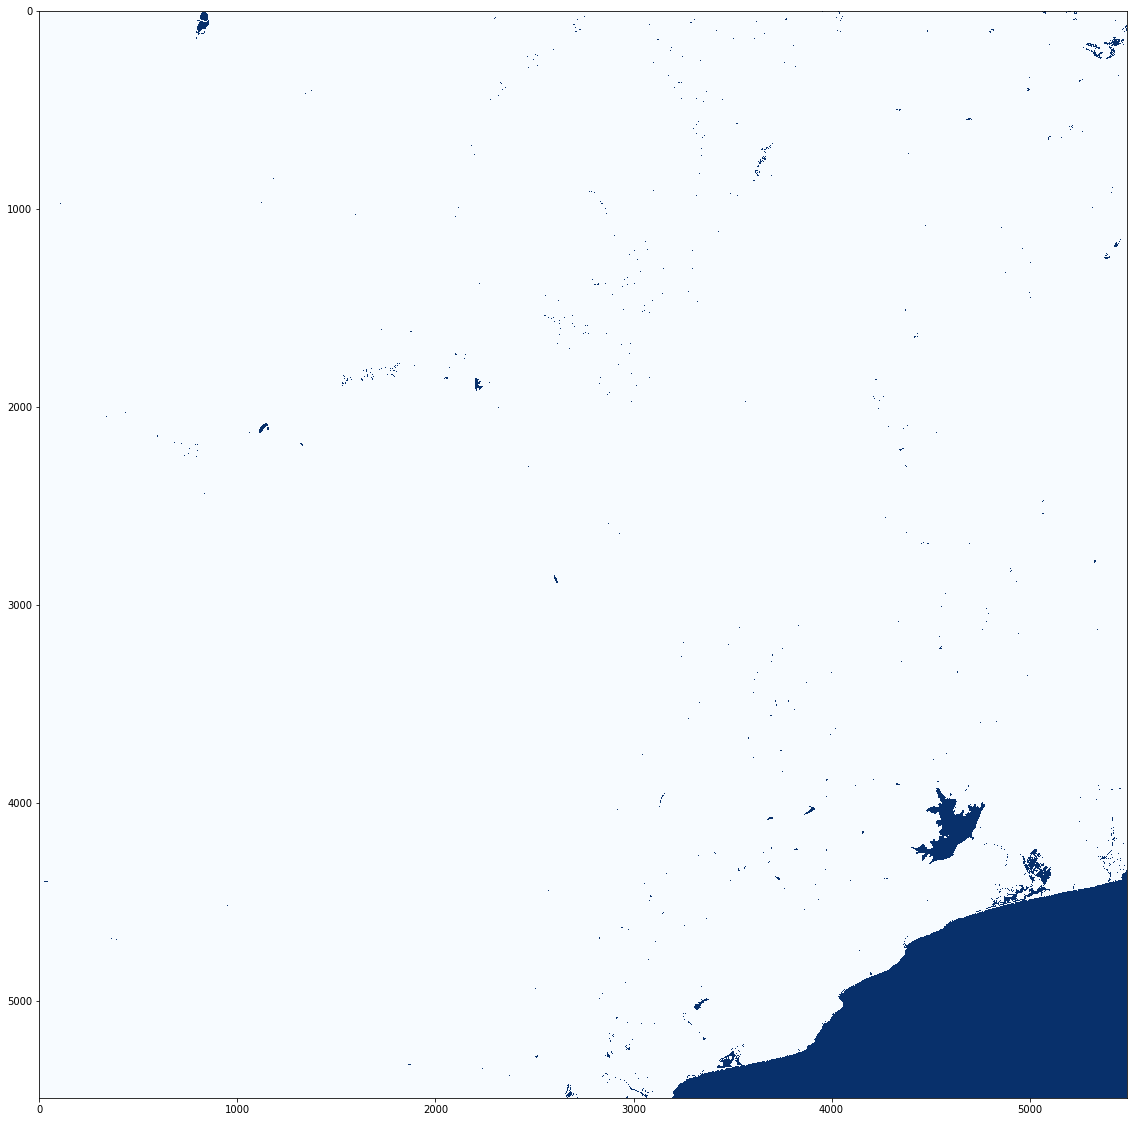

In [55]:
t = np.array([t]).reshape(dim_SE_020120)
plt.figure(figsize = (20,20))
plt.imshow(t, cmap='Blues')

In [64]:
np.savetxt('t.csv', t, delimiter=',')

## 1. Import training data

In [48]:
x_cols = ['B1','B2','B3','B4','B5','B6','B7','B8', 'B8A', 'B9','B10','B11','B12']

In [49]:
# Create training dataset
training = pd.read_csv('Data/Final/onlyres_training.csv', index_col = 0, header = 0) 

In [50]:
X = training[x_cols]
Y = training['Content']

## 2. Regularization

We will use regularization to prevent overfitting.

In [133]:
from sklearn import model_selection
from statistics import mean

def cross_val(training,K):

        neighbors = np.arange(0,1,0.1)
        
        CV = model_selection.KFold(n_splits = K, shuffle = False)
        
        knn_gen_acc = np.zeros(len(neighbors))
        
        n = len(neighbors)
        
        for s in range(0, n):
            k = 0
            
            knn_val_acc = np.zeros(K)
            
            X = training[x_cols].values
            y = training['Content'].values
            
            for train_index, val_index in CV.split(X, y):
    
                # extract training and test set for current CV fold
                X_train, y_train = X[train_index,:], y[train_index]
                X_val, y_val = X[val_index,:], y[val_index]
            
                knn_model = DecisionTreeClassifier(min_impurity_decrease=neighbors[s]) 
                knn_model = knn_model.fit(X_train, y_train)
    
                knn_y_val_estimated = knn_model.predict(X_val).T
                
                y_val = [1 if x<3 else 0 for x in y_val]
                knn_y_val_estimated = [1 if x<3 else 0 for x in knn_y_val_estimated]
                
                knn_val_acc[k] = 100-mean(Validation.evaluate(y_val,knn_y_val_estimated))*100
                
                k += 1
            
            knn_gen_acc[s] = np.sum(knn_val_acc) / len(knn_val_acc)
            print('Iteration number {0}/{1}. Error is {2}'.format(s,n, knn_gen_acc[s]))
            
        knn_max_acc = np.min(knn_gen_acc)       
        opt_lambda_index = np.argmin(knn_gen_acc) 
        opt_lambda = neighbors[opt_lambda_index]
       
        print('Accuracy - regularized knn - {0}'.format(np.round(np.log10(knn_max_acc), decimals = 3)))
        print('Optimal lambda: {0}'.format(opt_lambda))
        print()
        
        plt.plot(neighbors,knn_gen_acc, color = 'skyblue')
        plt.xlabel('Min impurity decrease to split')
        plt.ylabel('Error (%)')
        plt.grid()

### a) Logistic Regression

Iteration number 0/14. Error is 0.10672104003930656
Iteration number 1/14. Error is 0.10582650490765673
Iteration number 2/14. Error is 0.10471325396856343
Iteration number 3/14. Error is 0.10560726449148206
Iteration number 4/14. Error is 0.10404876452422798
Iteration number 5/14. Error is 0.11298329346322475
Iteration number 6/14. Error is 0.1289608881381838
Iteration number 7/14. Error is 0.1080216058853182
Iteration number 8/14. Error is 0.12594119009326335
Iteration number 9/14. Error is 0.09825645107461582
Iteration number 10/14. Error is 0.10427543667845499
Iteration number 11/14. Error is 0.11875665383515184
Iteration number 12/14. Error is 0.10960636061547575
Iteration number 13/14. Error is 0.07947273350785622
Accuracy - regularized knn - -1.1
Optimal lambda: 1000000.0



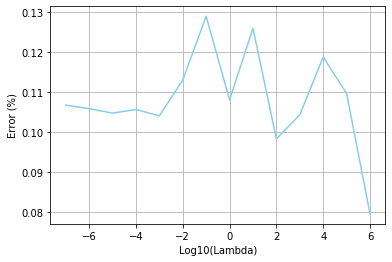

In [131]:
cross_val(training,5)

### b) Decision Trees

Iteration number 0/8. Error is 0.0520254473076335
Iteration number 1/8. Error is 0.04940248436137438
Iteration number 2/8. Error is 0.050331410589387816
Iteration number 3/8. Error is 0.055790429815155564
Iteration number 4/8. Error is 0.05998229277527116
Iteration number 5/8. Error is 0.05990719070668149
Iteration number 6/8. Error is 0.06417733858372685
Iteration number 7/8. Error is 0.059764126913015046
Accuracy - regularized knn - 0.049
Optimal lambda: 3



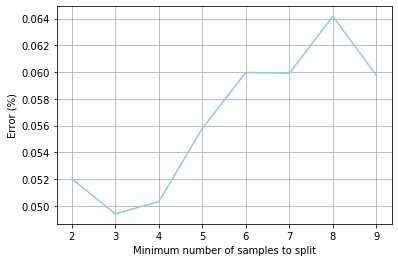

In [69]:
cross_val(training,5)

Iteration number 0/10. Error is 0.047712021142174876
Iteration number 1/10. Error is 6.098600212251552
Iteration number 2/10. Error is 6.098600212251552
Iteration number 3/10. Error is nan
Iteration number 4/10. Error is nan
Iteration number 5/10. Error is nan
Iteration number 6/10. Error is nan
Iteration number 7/10. Error is nan
Iteration number 8/10. Error is nan
Iteration number 9/10. Error is nan
Accuracy - regularized knn - nan
Optimal lambda: 0.30000000000000004



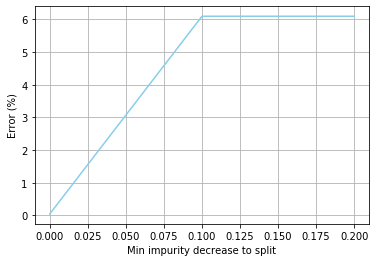

In [134]:
cross_val(training,5)

### c) KNN

Iteration number 0/6. Error is 0.008413284014963551
Iteration number 1/6. Error is 0.00796699685603528
Iteration number 2/6. Error is 0.019137357726566506
Iteration number 3/6. Error is 0.016155265905507577
Iteration number 4/6. Error is 0.02830472672013684
Iteration number 5/6. Error is 0.02830472672013684
Accuracy - regularized knn - 0.008
Optimal lambda: 2



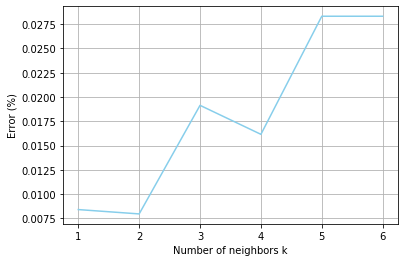

In [117]:
cross_val(training,5)

### d) NDWI

Accuracy - regularized log-reg - 0.071
Optimal lambda: -0.09000000000000001



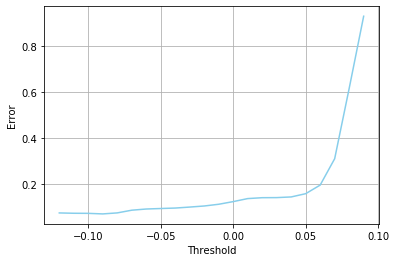

In [39]:
import numpy as np
index = 'NDWI'
rasterpath = "H:/sentinel2/Ghana/Training/28-12-18/NW/L2A_281218_20.tif"
root = "H:/sentinel2/Ghana/Training/28-12-18/NW/Shapefiles/"

thresh = np.arange(-0.12,0.1,0.01)
err = np.zeros(len(thresh))

for i in range(len(thresh)):
    y_true, y_pred = Validation.y_true_pred_index(index, root, rasterpath, t =thresh[i])
    err[i] = 1-Validation.evaluate(y_true,y_pred)[3]

min_err = np.min(err)       
opt_thresh_index = np.argmin(err) 
opt_thresh = thresh[opt_thresh_index]

print('Accuracy - regularized log-reg - {0}'.format(np.round(min_err, decimals = 3)))
print('Optimal lambda: {0}'.format(opt_thresh))
print()

plt.plot(thresh,err, color = 'skyblue')
plt.xlabel('Threshold')
plt.ylabel('Error')
plt.grid()

In [114]:
from random import shuffle
import Script.Processing as Processing

def cross_val(training,K):
    
    thresh = np.arange(-0.15,0.15,0.01)
    err = np.zeros(len(thresh))

    for i in range(len(thresh)):
        y_true = list(training.Content)
        y_true = [1 if x<3 else 0 for x in y_true]
        _,y_pred = Processing.AWEI(training, thresh[i])
        err[i] = 100-Validation.evaluate(y_true,y_pred)[3]*100

    min_err = np.min(err)       
    opt_thresh_index = np.argmin(err) 
    opt_thresh = thresh[opt_thresh_index]

    print('Accuracy - regularized log-reg - {0}'.format(np.round(min_err, decimals = 3)))
    print('Optimal lambda: {0}'.format(opt_thresh))
    print()

    plt.plot(thresh,err, color = 'skyblue')
    plt.xlabel('Threshold')
    plt.ylabel('Error (%)')
    plt.grid()

Accuracy - regularized log-reg - 45.053
Optimal lambda: -0.15



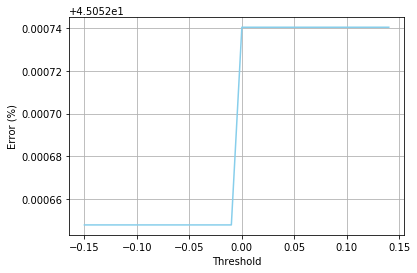

In [115]:
cross_val(training,5)

### K-Means

In [ ]:
def cross_val(training,K):
    
    k = list(range(2,7))
    err = np.zeros(len(thresh))

    for i in range(len(thresh)):
        y_true = training.Content
        _,y_pred = Processing.NDWI(training, thresh[i])
        err[i] = 100-mean(Validation.evaluate(y_true,y_pred))*100

    min_err = np.min(err)       
    opt_thresh_index = np.argmin(err) 
    opt_thresh = thresh[opt_thresh_index]

    print('Accuracy - regularized log-reg - {0}'.format(np.round(min_err, decimals = 3)))
    print('Optimal lambda: {0}'.format(opt_thresh))
    print()

    plt.plot(thresh,err, color = 'skyblue')
    plt.xlabel('Threshold')
    plt.ylabel('Error (%)')
    plt.grid()

## 3. Train algorithms

In [6]:
# Train model
LogReg=LogisticRegression(max_iter = 300, penalty = 'l2', C = 1/100, fit_intercept=False)
LogReg.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(LogReg, 'Algo/Final/loose_LogReg.pkl') 

['Algo/final_LogReg.pkl']

In [6]:
# Train model
DT = DecisionTreeClassifier()
DT.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(DT, 'Algo/Final/DT.pkl')

['Algo/Final/DT.pkl']

In [62]:
# Train model
RF = RandomForestClassifier()
RF.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(RF, 'Algo/Final/RF.pkl')

['Algo/Final/RF.pkl']

In [149]:
# Train model
KNN= KNeighborsClassifier(n_neighbors=7)
KNN.fit(X, Y);

# Save the trained model as a pickle string. 
joblib.dump(KNN, 'Algo/Final/KNN.pkl')

['Algo/Final/KNN.pkl']

## 4. Interpretation

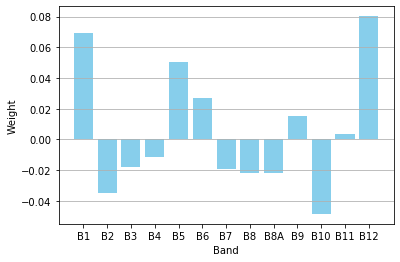

In [7]:
#LogReg = joblib.load('Algo/final_LogReg.pkl')
y = LogReg.coef_[0]
x = np.arange(len(y))
plt.bar(x, y, tick_label = x_cols, color = 'skyblue')
plt.xlabel('Band')
plt.ylabel('Weight')
plt.grid(axis='y', linestyle='-')

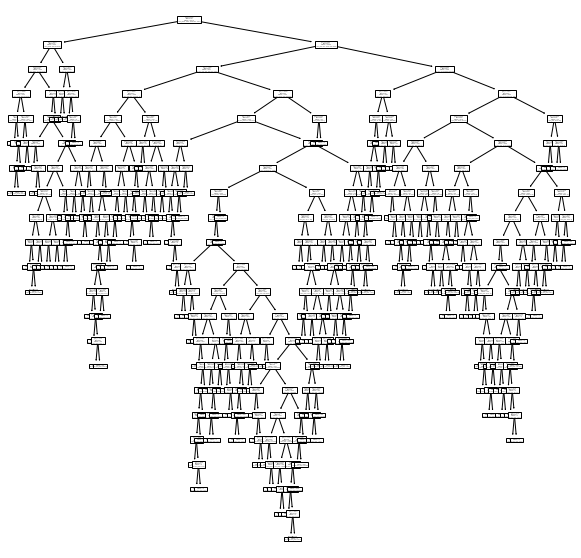

In [33]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(10, 10))  # whatever size you want
plot_tree(DT, ax=ax)
plt.show()

In [28]:
DT.get_depth()

21

In [29]:
DT.get_n_leaves()

260

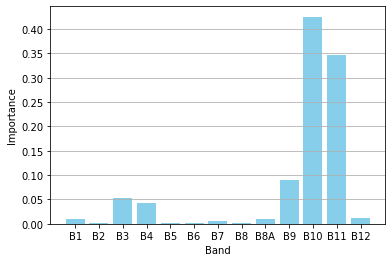

In [35]:
y = DT.feature_importances_
x = np.arange(len(y))
plt.bar(x, y, tick_label = x_cols, color = 'skyblue')
plt.xlabel('Band')
plt.ylabel('Importance')
plt.grid(axis='y', linestyle='-')